In [120]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os
from copy import copy

# BarPlot

In [121]:
barjson = json.load(open('D:\\download\\OGR\\data\\bardata(1031)\\bar\\annotations\\instancesBar(1031)_train2019.json'))
image_df = pd.DataFrame(barjson['images'])
ann_df = pd.DataFrame(barjson['annotations'])
ann_df.head()

,image_id,category_id,bbox,area,id
0,0,0,"[542.0, 525.0, 64.0, 84.0]",5376.0,0
1,0,0,"[676.0, 597.0, 64.0, 12.0]",768.0,1
2,0,0,"[273.0, 496.0, 64.0, 112.0]",7168.0,2
3,0,0,"[407.0, 456.0, 64.0, 153.0]",9792.0,3
4,0,0,"[542.0, 361.0, 64.0, 164.0]",10496.0,4


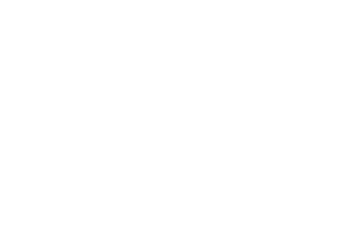

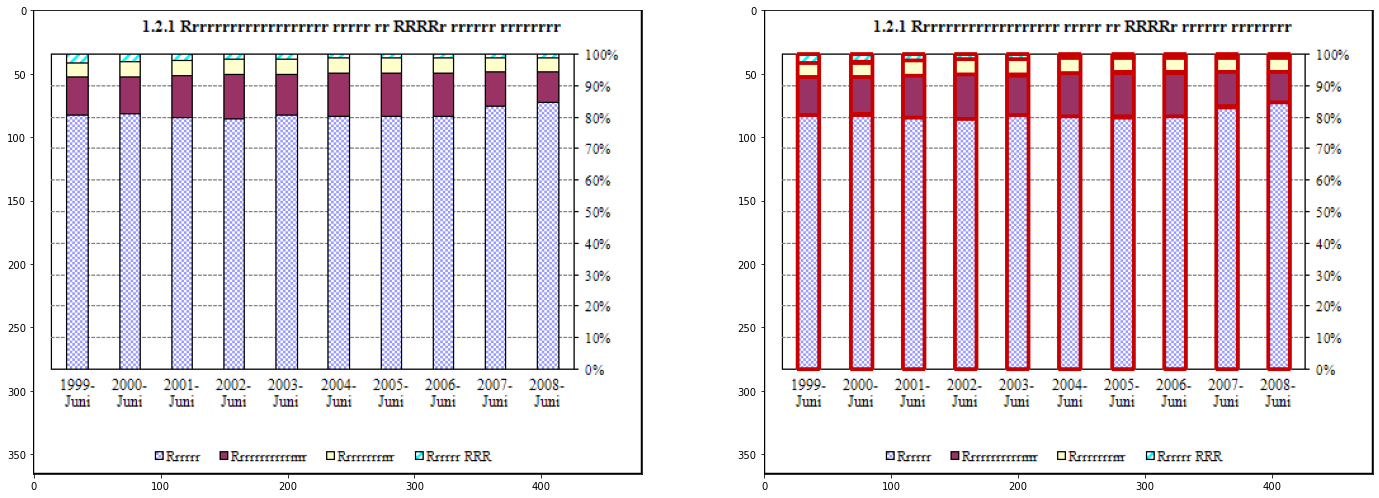

In [122]:
target = random.randint(0, len(barjson['images']))
image_path = os.path.join('D:\\download\\OGR\\data\\bardata(1031)\\bar\\images\\train2019', barjson['images'][target]['file_name'])
bbox_idx = list(ann_df[ann_df['image_id'] == target].index)
try:
    ann_list = barjson['annotations'][min(bbox_idx):max(bbox_idx)+1]  
except:
    print(bbox_idx)
    raise ValueError
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = copy(image)
for ann in ann_list:
    bbox = ann['bbox']
    xmin = int(bbox[0])
    ymin = int(bbox[1])
    w = int(bbox[2])
    h = int(bbox[3])

    cv2.rectangle(image, (xmin, ymin), (xmin+w, ymin+h), (200,0,0), 2)
plt.axis('off')
fig = plt.figure(figsize=(24, 16))
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(original)
ax2 = fig.add_subplot(rows, cols, 2)
plt.imshow(image)

# LinePlot

In [123]:
linejson = json.load(open('data/linedata(1028)/line/annotations/instancesLine(1023)_test2019.json'))
lineclsjson = json.load(open('data/linedata(1028)/line/annotations/instancesLineCls(1119)_test2019.json'))
lineclsexjson = json.load(open('data/linedata(1028)/line/annotations/instancesLineClsEx(1119)_test2019.json'))
lineclsrealjson = json.load(open('data/linedata(1028)/line/annotations/instancesLineClsReal(1119)_test2019.json'))
image_df = pd.DataFrame(linejson['images'])
ann_df = pd.DataFrame(linejson['annotations'])

In [124]:
lineclsrealjson['annotations']

[{'image_id': 116745, 'category_id': 0, 'bbox': [], 'area': 0, 'id': 1},
 {'image_id': 116746, 'category_id': 0, 'bbox': [], 'area': 0, 'id': 2},
 {'image_id': 116747, 'category_id': 0, 'bbox': [], 'area': 0, 'id': 3},
 {'image_id': 116748, 'category_id': 0, 'bbox': [], 'area': 0, 'id': 4},
 {'image_id': 116749,
  'category_id': 0,
  'bbox': [[[96.16, 370.74], [113.51, 371.11]],
   [[78.7, 369.16], [96.16, 370.74]],
   [[113.51, 371.11], [130.97, 369.8]],
   [[96.16, 370.74], [113.51, 371.11]],
   [[253.87, 290.56], [271.99, 282.71]],
   [[236.11, 290.32], [253.87, 290.56]]],
  'area': 0,
  'id': 5},
 {'image_id': 116750,
  'category_id': 0,
  'bbox': [[[78.66, 361.79], [96.27, 367.42]],
   [[60.62, 356.42], [78.66, 361.79]],
   [[96.27, 367.42], [113.64, 368.66]],
   [[78.66, 361.79], [96.27, 367.42]],
   [[113.64, 368.66], [130.74, 366.63]],
   [[96.27, 367.42], [113.64, 368.66]],
   [[130.74, 366.63], [148.45, 361.5]],
   [[130.74, 366.63], [148.48, 347.6]],
   [[113.64, 368.66], [1

[array([119.,  93., 188., 174., 258., 161., 327., 154., 397.,  77., 466.,
       130.]), array([119., 225., 188., 251., 258., 255., 327., 187., 397., 111., 466.,
       105.])]


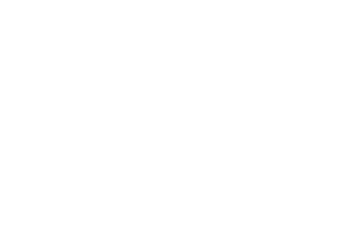

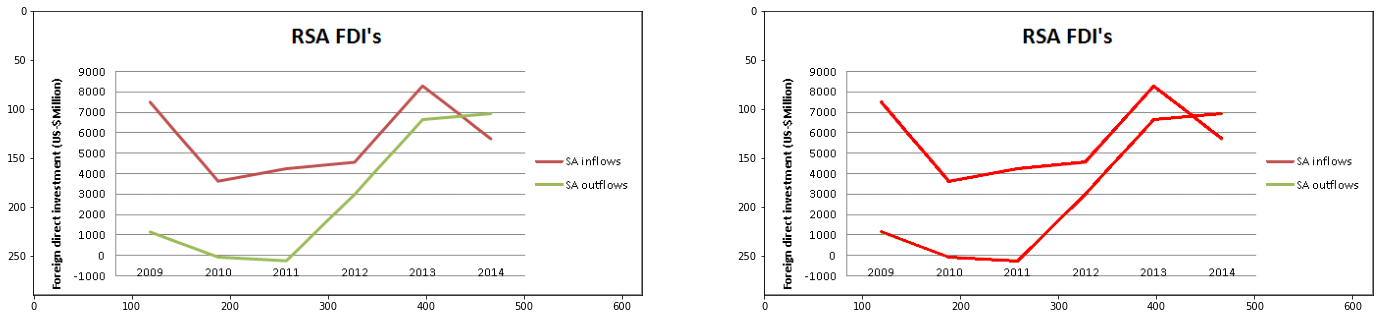

In [126]:
rand = random.randint(0, len(linejson['images']))
target_id = image_df['id'][rand]
image_path = 'data/linedata(1028)/line/images/test2019/' + linejson['images'][rand]['file_name']
bbox_idx = list(ann_df[ann_df['image_id'] == target_id].index)
ann_list = linejson['annotations'][min(bbox_idx):max(bbox_idx)+1]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = copy(image)
bboxes = []
max_len = 0
for annotation in ann_list:
    bbox = np.array(annotation["bbox"])
    bboxes.append(bbox)
    max_len = max(max_len, len(bbox))
print(bboxes)
for ind_bbox in range(len(bboxes)):
    if len(bboxes[ind_bbox]) < max_len:
        bboxes[ind_bbox] = np.pad(bboxes[ind_bbox], (0, max_len - len(bboxes[ind_bbox])), 'constant',
                                    constant_values=(0, 0))
bboxes = np.array(bboxes, dtype=float).tolist()
for coord in bboxes:
    points = []
    for i in range(int(len(coord)/2)):
        x, y = coord[2*i:2*(i+1)]
        if x == 0. and y == 0.:
            continue
        points.append([x,y])
    image = cv2.polylines(image, [np.array(points, dtype=np.int32)], False, (255,0,0), 2)
plt.axis('off')
fig = plt.figure(figsize=(24, 16))
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(original)
ax2 = fig.add_subplot(rows, cols, 2)
plt.imshow(image)

# Pie Plot



In [170]:
piejson = json.load(open('data/piedata(1008)/pie/annotations/instancesPie(1008)_train2019.json'))
image_df = pd.DataFrame(piejson['images'])
ann_df = pd.DataFrame(piejson['annotations'])


[array([278.,  89., 303.,  93., 278., 170.]), array([303.,  93., 349., 130., 278., 170.]), array([349., 130., 197., 158., 278., 170.]), array([197., 158., 219., 114., 278., 170.]), array([219., 114., 278.,  89., 278., 170.])]


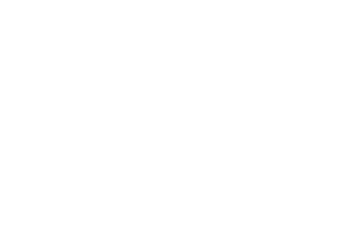

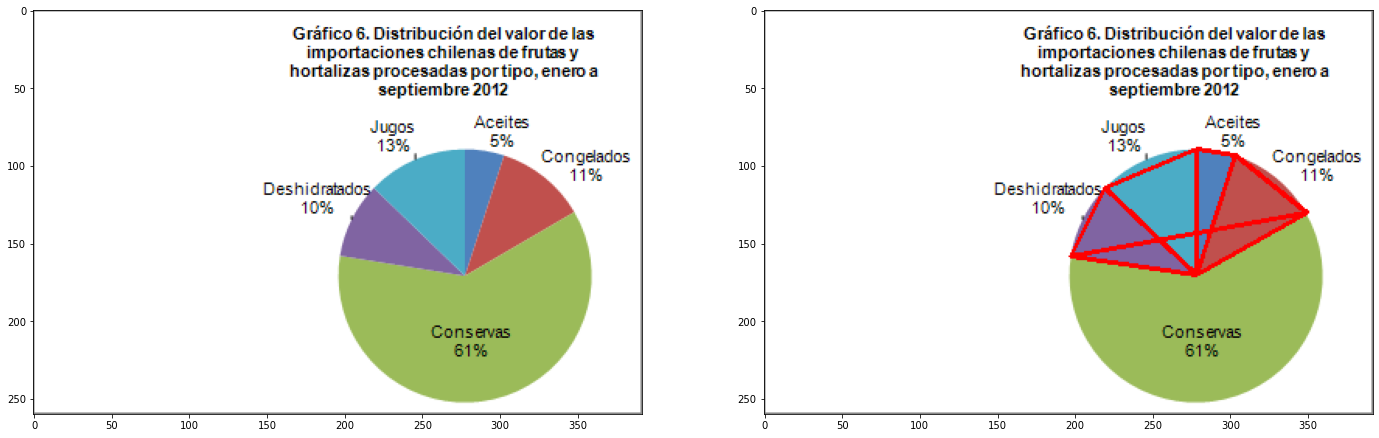

In [222]:
rand = random.randint(0, len(piejson['images']))
target_id = image_df['id'][rand]
image_path = 'data/piedata(1008)/pie/images/train2019/' + piejson['images'][rand]['file_name']
bbox_idx = list(ann_df[ann_df['image_id'] == target_id].index)
ann_list = piejson['annotations'][min(bbox_idx):max(bbox_idx)+1]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = copy(image)
bboxes = []
max_len = 0
for annotation in ann_list:
    bbox = np.array(annotation["bbox"])
    bboxes.append(bbox)
    max_len = max(max_len, len(bbox))
print(bboxes)
for ind_bbox in range(len(bboxes)):
    if len(bboxes[ind_bbox]) < max_len:
        bboxes[ind_bbox] = np.pad(bboxes[ind_bbox], (0, max_len - len(bboxes[ind_bbox])), 'constant',
                                    constant_values=(0, 0))
bboxes = np.array(bboxes, dtype=float).tolist()
for coord in bboxes:
    points = []
    for i in range(int(len(coord)/2)):
        x, y = coord[2*i:2*(i+1)]
        if x == 0. and y == 0.:
            continue
        points.append([x,y])
    image = cv2.polylines(image, [np.array(points, dtype=np.int32)], True, (255,0,0), 2)
plt.axis('off')
fig = plt.figure(figsize=(24, 16))
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(original)
ax2 = fig.add_subplot(rows, cols, 2)
plt.imshow(image)